[latex_cheat_sheet](http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf)  
[latex_cheat_sheet_2](https://wch.github.io/latexsheet/)

<center style='font-size:220%'>Guitar Modeling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import notebook_helpers as nh

import pandas as pd # delete later

Table of Contents

- [Guitar Class](#guitar_class)  
- [Magnetics](#pickup_mag)  
- [Electrical](#pickup_electrical)

<center id='guitar_class'><h1>Using the <code>Guitar</code> Class

In [1]:
import noodler

In [2]:
a = noodler.noodler.StandardNoodle()

Making Guitar.

    Number of Strings:6
    Number of Frets:22
    Scale Length:0.6477
    Tuning:['e4', 'b3', 'g3', 'd3', 'a2', 'e2']
    Gauges:[10, 13, 17, 30, 42, 52]
    Action Recommendation: fralin
ADD IN SPICE OF LC YA AWESOME HUMAN


In [4]:
toan=a.toan_part.circuit
pickup=a.pickups['bridge'].electrical.circuit_model

In [13]:
pickup.

W 1 2; right=0.5
W 2 4; up=0.4
W 3 5; up=0.4
R1 4 5 250000; right
W 2 6; down=0.8
W 3 7; down=0.8
W 6 8; right=0.5
W 8 10; up=0.4
W 9 11; up=0.4
R2 10 11 220000.0; right
W 8 12; down=0.4
W 9 13; down=0.4
C1 12 13 1.5e-09; right
W 9 7; right=0.5
W 3 0; right=0.5

In [5]:
pickup[0].v

In [16]:
pickup.oneport(5)

I(       ⎛                                                                      
       ⎜                                                                      
       ⎜                                                                      
       ⎜                                                                      
       ⎜                                                                      
       ⎜                                                                      
Rₑ⋅V₄₂⋅⎜──────────────────────────────────────────────────────────────────────
       ⎜                                                                      
       ⎜  2   2       2                 2         2             2             
       ⎝L₁ ⋅Rₑ  + 2⋅L₁ ⋅Rₑ⋅R_pickup + L₁ ⋅R_pickup  + 2⋅L₁⋅L₂⋅Rₑ  - 2⋅L₁⋅L₂⋅Rₑ
──────────────────────────────────────────────────────────────────────────────
                                                                              

                                                 

In [53]:
from lcapy import Circuit, j, omega, s, R, C, L, V, LSection, Series, Shunt

In [19]:
pi = pickup.oneport('Cpickup').simplify()

In [10]:
tfpickup=(pickup.Cpickup.V(s) / pickup.V42.V(s))

In [ ]:
tfpickup

In [15]:
z = tfpickup.ZPK()

<AxesSubplot:xlabel='Re(s)', ylabel='Im(s)'>

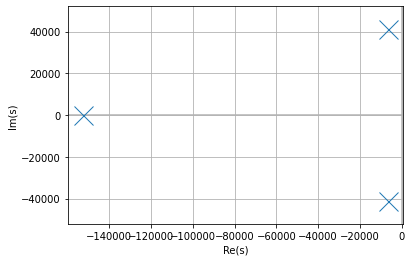

In [18]:
z.pole_zero_plot()

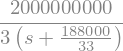

In [24]:
toan.impedance("R_vol")

In [22]:
toan.transfer("R_vol","R_toan_bleed")

In [8]:
pickup

V 1 0_1 4;down
L1 1 2 2.5;right
R_eddy 2 2_1 200000.0;down
W 0 2_1;right
L2 2 3 2.5;right
R_pickup 3 4 15000.0;right
C_pickup 4 4_1 1.2e-10;down
W 2_1 4_1;right
W 4 5;right
W 4_1 5_1;right

Making Guitar.

    Number of Strings:6
    Number of Frets:22
    Scale Length:0.6477
    Tuning:['e4', 'b3', 'g3', 'd3', 'a2', 'e2']
    Gauges:[10, 13, 17, 30, 42, 52]
    Action Recommendation: fralin


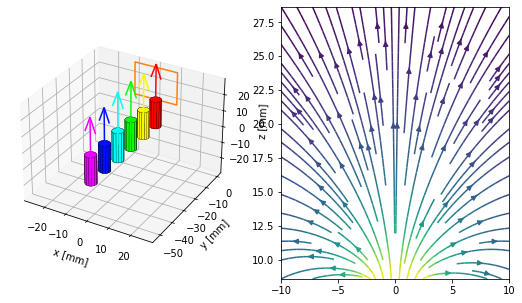

In [3]:
gtr = noodler.StandardNoodle()
gtr.plot_pickup_mags('bridge')

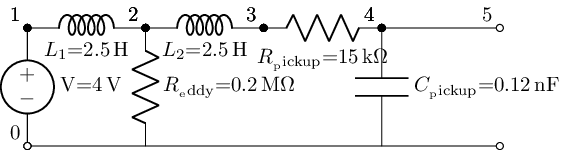

In [4]:
gtr.pickups["bridge"].electrical.draw()

In [10]:
gtr.pickups["bridge"].electrical.circuit_model

L1 0_1 1 2.5;right
R_eddy 1 1_1 200000.0;down
W 0 1_1;right
L2 1 2 2.5;right
R_pickup 2 3 15000.0;right
C_pickup 3 3_1 1.2e-10;down
W 1_1 3_1;right

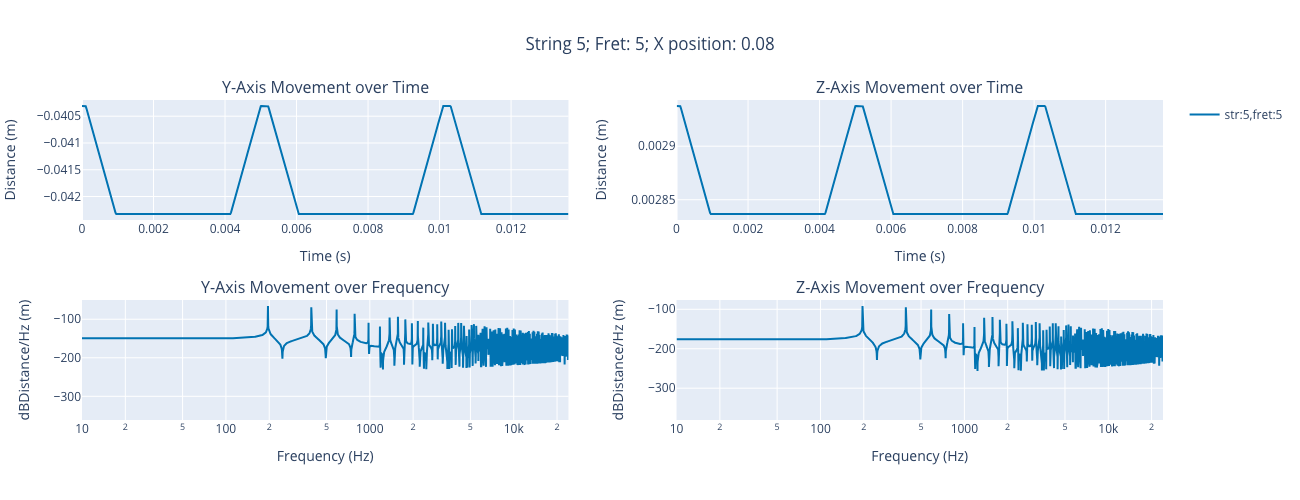

In [3]:
pluck_at_frets = (5)
gtr.strings[5].plot_pluck(pluck_at_frets, x=0.08)

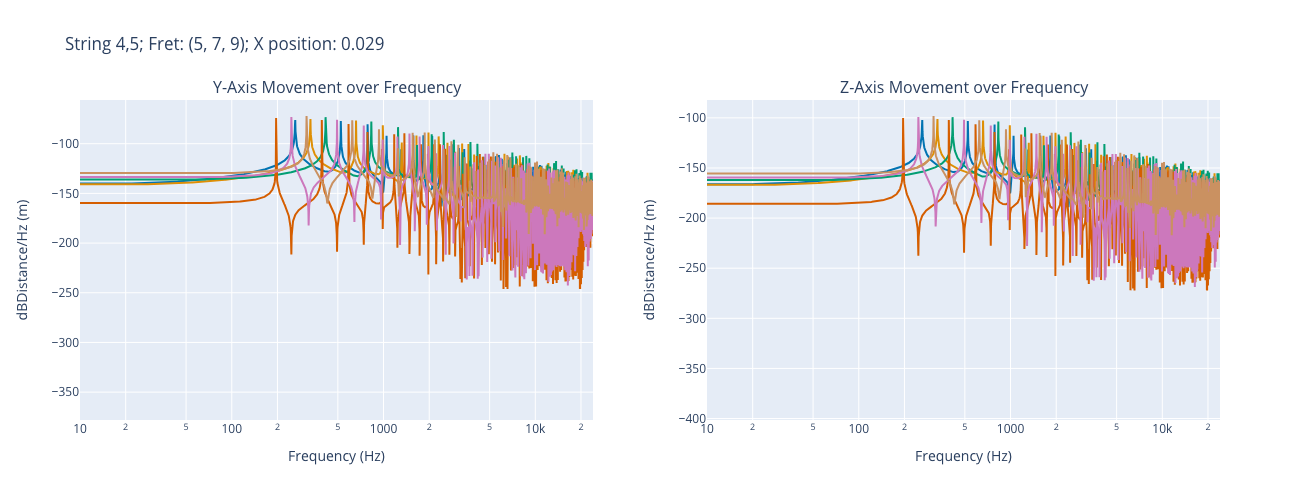

In [5]:
pluck_at_frets = (5,7,9)
gtr.plot_pluck((4,5),pluck_at_frets,plot_time=False)

<center><h2>Property of string

In [6]:
gtr.strings[5].properties

tuning  gauge  action (m)  diameter (m)    area (m^2)  length (m)  \
5     a2     42    0.002858      0.001067  8.938320e-07      0.6477   

   x_max (m)  y_position (m)  z_position (m)  frequency_fundamental (Hz)  \
5     0.6477        -0.04191        0.002858                       110.0   

   linear_mass_density (kg/m)  tension (N)  
5                    0.000004     0.075511

<center><h2>Property of string at a specific fret

In [7]:
gtr.strings[1].at_fret[3]

note                                                  g4
fret                                                   3
string_number                                          1
note_name                                              g
note_octave                                            4
frequency_fundamental (Hz)                    391.995436
x_position (m)                                 -0.544649
y_position (m)                                       0.0
position (m)                  [-0.5446486081598308, 0.0]
linear_mass_density (kg/m)                           0.0
tension (N)                                     0.055333
Name: 3, dtype: object

<center><h2>All strings at a certain fret

viewing properties at a certain fret:

In [8]:
gtr.at_fret[2]

note fret string_number note_name note_octave frequency_fundamental (Hz)  \
2  f#4    2             1        f#           4                 369.994423   
2  c#4    2             2        c#           4                 277.182631   
2   a3    2             3         a           3                      220.0   
2   e3    2             4         e           3                 164.813778   
2   b2    2             5         b           2                 123.470825   
2  f#2    2             6        f#           2                  92.498606   

  x_position (m) y_position (m)                                  position (m)  \
2      -0.577035            0.0                    [-0.5770350997394977, 0.0]   
2      -0.577035      -0.010478             [-0.5770350997394977, -0.0104775]   
2      -0.577035      -0.020955              [-0.5770350997394977, -0.020955]   
2      -0.577035      -0.031433             [-0.5770350997394977, -0.0314325]   
2      -0.577035       -0.04191               [-0.5770350997394977, -0.04191]   
2      -0.577035      -0.052388  [-0.5770350997394977, -0.052387500000000004]   

  linear_mass_density (kg/m) tension (N)  
2                        0.0    0.052227  
2                        0.0    0.049545  
2                   0.000001     0.05337  
2                   0.000002    0.080641  
2                   0.000003    0.084758  
2                   0.000005    0.070897

<center><h2>All strings at all frets

In [10]:
gtr.frets

note fret string_number note_name note_octave frequency_fundamental (Hz)  \
0    e4    0             1         e           4                    329.628   
1    f4    1             1         f           4                    349.228   
2   f#4    2             1        f#           4                    369.994   
3    g4    3             1         g           4                    391.995   
4   g#4    4             1        g#           4                    415.305   
..  ...  ...           ...       ...         ...                        ...   
16  g#3   16             6        g#           3                    207.652   
17   a3   17             6         a           3                        220   
18  a#3   18             6        a#           3                    233.082   
19   b3   19             6         b           3                    246.942   
20   c4   20             6         c           4                    261.626   

   x_position (m) y_position (m)  \
0         -0.6477              0   
1       -0.611347              0   
2       -0.577035              0   
3       -0.544649              0   
4        -0.51408              0   
..            ...            ...   
16       -0.25704     -0.0523875   
17      -0.242613     -0.0523875   
18      -0.228997     -0.0523875   
19      -0.216144     -0.0523875   
20      -0.204013     -0.0523875   

                                     position (m) linear_mass_density (kg/m)  \
0                                  [-0.6477, 0.0]                2.55195e-07   
1                      [-0.6113473923239329, 0.0]                2.40872e-07   
2                      [-0.5770350997394977, 0.0]                2.27353e-07   
3                      [-0.5446486081598308, 0.0]                2.14592e-07   
4                      [-0.5140798306799014, 0.0]                2.02548e-07   
..                                            ...                        ...   
16   [-0.2570399153399505, -0.052387500000000004]                2.19964e-06   
17  [-0.24261337342325645, -0.052387500000000004]                2.07618e-06   
18   [-0.2289965310872632, -0.052387500000000004]                1.95965e-06   
19  [-0.21614394338648263, -0.052387500000000004]                1.84967e-06   
20  [-0.20401271600422716, -0.052387500000000004]                1.74585e-06   

   tension (N)  
0      465.293  
1       492.96  
2      522.273  
3      553.329  
4      586.232  
..         ...  
16     1591.59  
17     1686.23  
18      1786.5  
19     1892.73  
20     2005.28  

[126 rows x 11 columns]

<center><h2>String Movment

Plotting per frets:

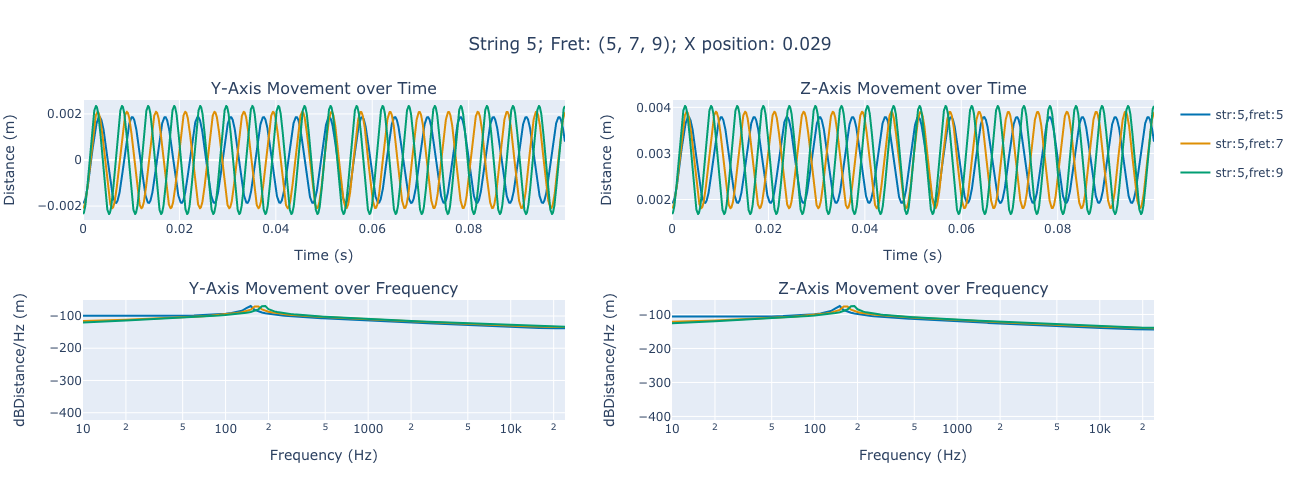

In [11]:
pluck_at_frets = (5,7,9)
gtr.strings[5].plot_pluck(pluck_at_frets)

Plotting plucks across strings and frets:

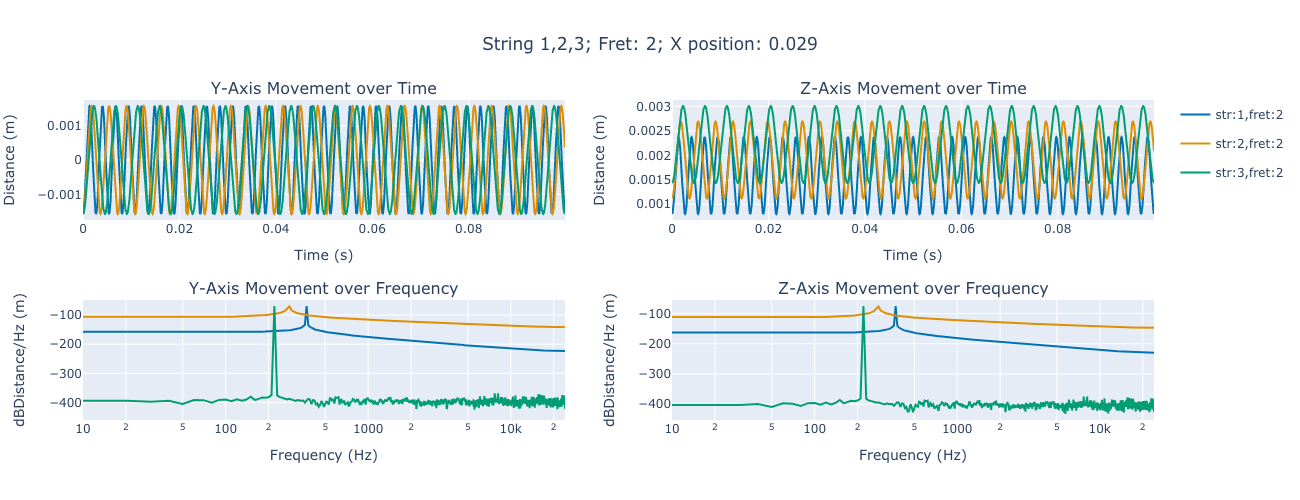

In [12]:
pluck_strings = (1,2,3)
pluck_at_frets = 2
gtr.plot_pluck(pluck_strings, pluck_at_frets)

<center><h2>String Area at Initial Position

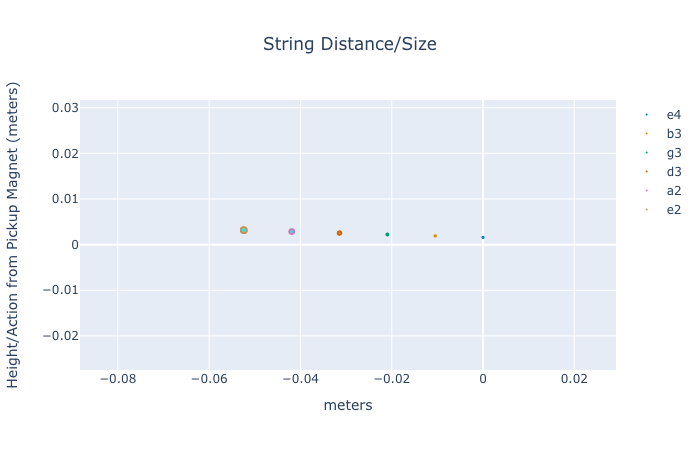

In [13]:
gtr._plot_strings_yz_initial()

<center><h2>Frequency as Fret Number Increases

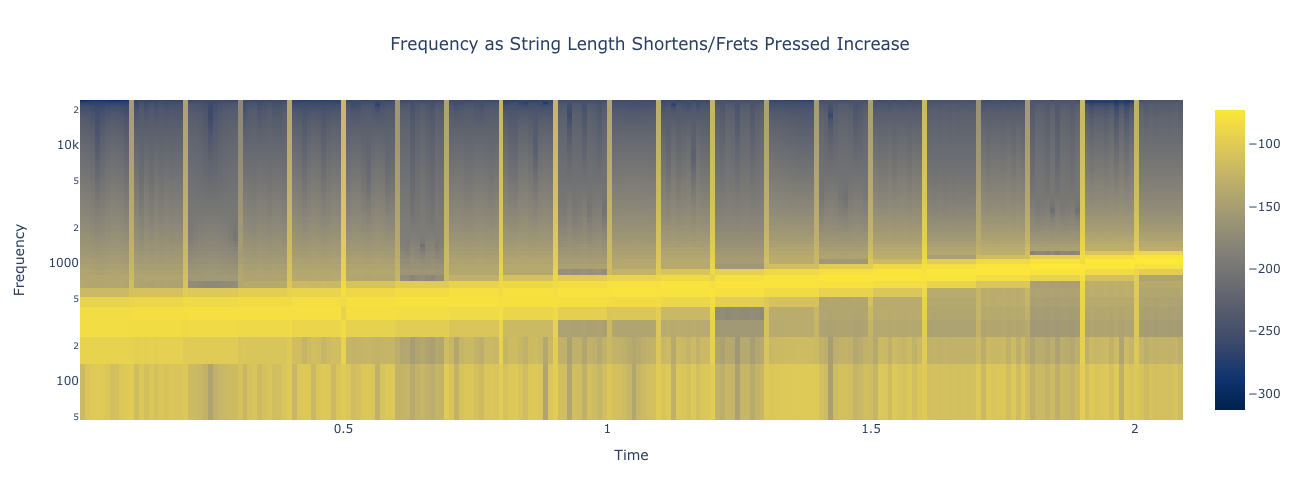

In [16]:
import numpy as np
import notebook_helpers as nh

string = gtr.strings[1]

data = np.empty(0)
for fret in range(string.num_of_frets):
    y, z, t = string.pluck(fret,fs=48e3)
    data = np.hstack((data,y))

nh.spectrogram(data,48e3,title='Frequency as String Length Shortens/Frets Pressed Increase')

<center><h1>The Pickup

<center id='pickup_mag'><h2>Magnetic Pickup Model

Source for below values: [seymour duncan](https://www.seymourduncan.com/blog/swd/what-is-the-gauss-force-oersteds-and-maximum-energy-of-various-magnets-dr-nick-toth-bloomington-indiana)


In [10]:
# magnet material: [millitesla, oersteds, BHmax]
noodler.pickup_magnetics.magnet_materials

{'material_name': ['millitesla', 'oersteds', 'BHmax'],
 'alnico_1': [720, 470, 1.4],
 'alnico_2': [750, 560, 1.7],
 'alnico_3': [700, 480, 1.35],
 'alnico_4': [560, 720, 1.35],
 'alnico_5': [1280, 640, 5.5]}

<center><h3>Using the <code>Pickup_Magnetics</code> Class

TypeError: display() got an unexpected keyword argument 'subplotAx'

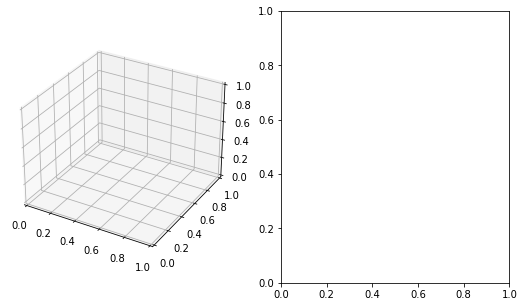

In [4]:
gtr.plot_pickup_mags('bridge')

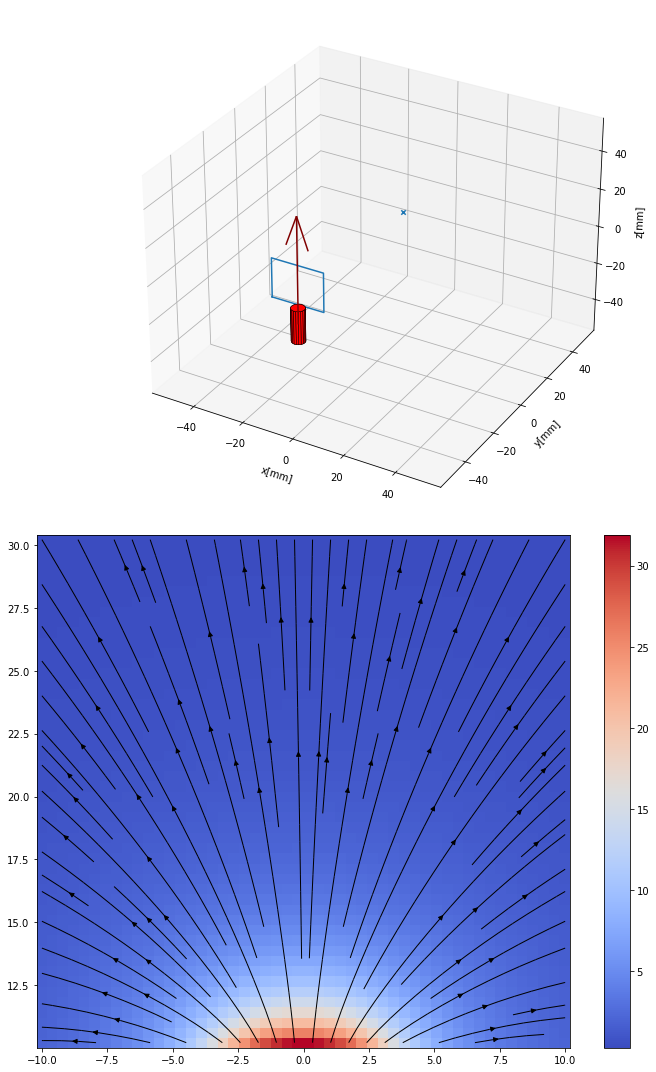

In [7]:
gtr.plot_pickup_mag('bridge',5)

In [158]:
pickup.sources[0]

type: magnet.Cylinder 
 magnetization: x: 0.0, y: 0.0, z: 150.0 
 dimensions: d: 4.95, h: 17.04 
 position: x: 0.0, y:0.0, z: 0.0 
 angle: 0.0 
 axis: x: 0.0, y: 0.0, z:1.0

---


<center id='pickup_electrical'><h2>Electrical Pickup Model</h2></center>

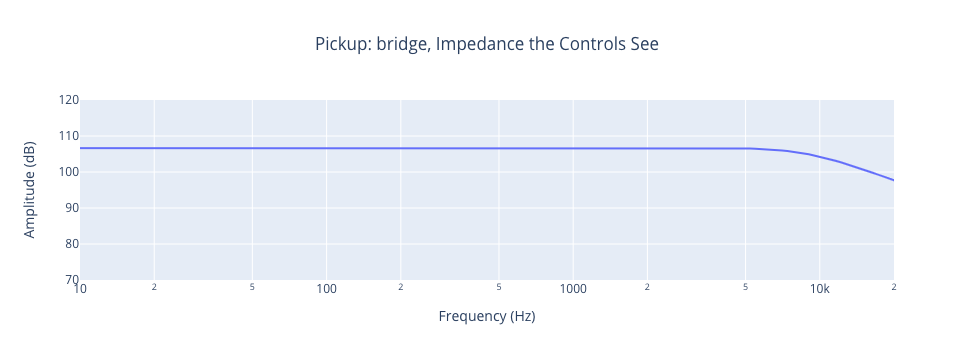

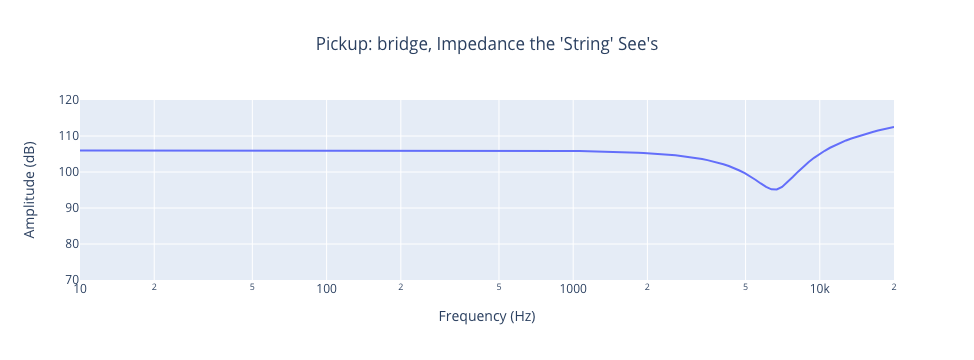

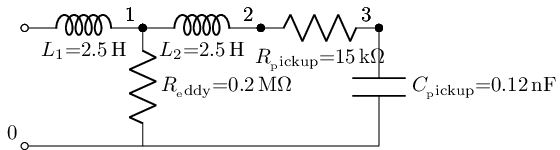

In [13]:
pickup = gtr.pickups['bridge'].electrical
pickup.plot_impedance_vs_frequency()
pickup.draw()

In [14]:
pickup.circuit_model.

<bound method Netlist.ac of L1 0_1 1 2.5;right
R_eddy 1 1_1 200000.0;down
W 0 1_1;right
L2 1 2 2.5;right
R_pickup 2 3 15000.0;right
C_pickup 3 3_1 1.2e-10;down
W 1_1 3_1;right>

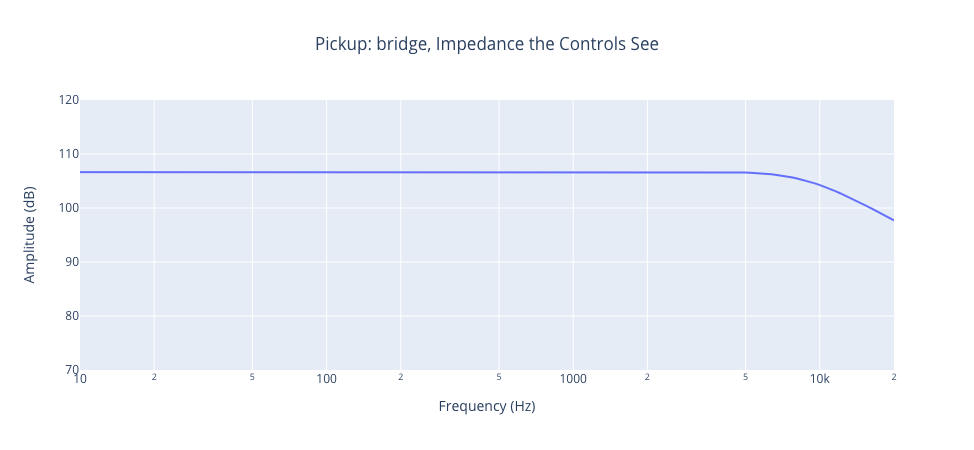

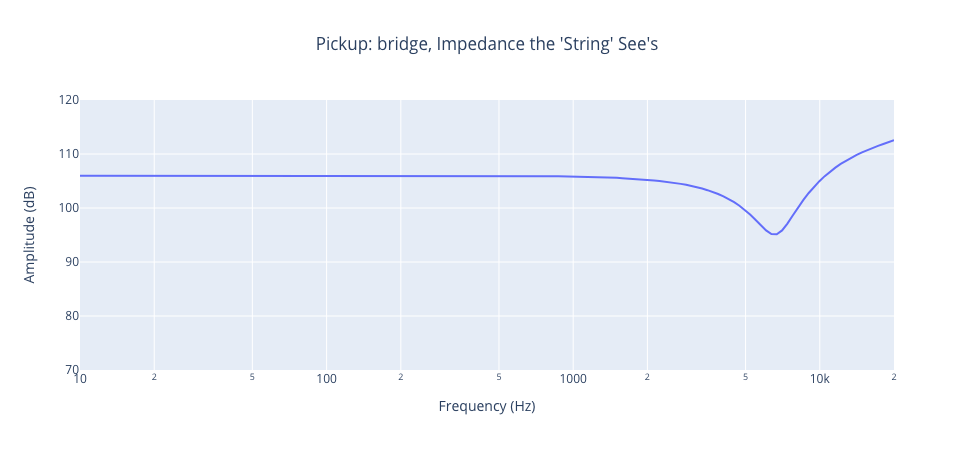

In [5]:
gtr.pickups['bridge'].electrical.plot_impedance_vs_frequency()